## **Telco Customers Churn Analysis**

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Data Science/Tugas EDA day 17/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### **Missing Value**

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.eq(' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In the DataFrame, there are 11 data in the `TotalCharges` contains white space so we must exclude

In [ ]:
#Exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [ ]:
# check
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#show info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


The `monthlyCharges` variable has an incorrect data type (object), and it needs to be converted to a float data type

In [ ]:
#Transform TotalCharges col to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [ ]:
#show info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Observations:
1. After excluding rows with `TotalCharges` column contains white space, the dataset comprises **21 columns** and a total of **7032 rows**.
2. The dataset has **no missing values** (non-null counts are consistent across all columns).
3. All data types (dtypes) seem **appropriate**, given the corresponding column name.

Make sure there are **no missing values in the data**

### **Duplicated Data Check**

In [ ]:
# number of duplicated data
df.duplicated().sum()

0

In [ ]:
# number of missing values per column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Ensure that there are no duplicate entries in the data, meaning each primary key is unique and not repeated

###  **General Info**

In [ ]:
# Showing top 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# sample 10 rows of the data
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2992,4177-JPDFU,Male,0,No,No,12,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,34.00,442.45,No
6836,5868-YWPDW,Male,1,Yes,No,6,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.20,519.15,Yes
3192,1231-YNDEK,Male,0,No,No,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.15,1035.50,No
2171,3995-WFCSM,Female,0,No,No,2,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,60.85,111.40,No
2795,0709-TVGUR,Female,1,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,622.90,Yes
4415,0420-TXVSG,Male,0,Yes,No,66,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Credit card (automatic),66.10,4428.45,No
3857,3675-EQOZA,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.65,93.55,No
2333,4981-FLTMF,Female,0,Yes,Yes,57,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),65.20,3687.85,No
1725,5935-FCCNB,Female,1,No,No,17,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,1608.15,No
900,1051-GEJLJ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.50,27.55,No


Observations:
1. All columns, except the `tenure`, `MonthlyCharges`, and `TotalCharges`, contain categorical or binary data.
2. The `PhoneService`, `PaperlessBilling`, `Partner`, `Dependents`, and `Churn` columns appear to be categorical with values like Yes or No.
3. The `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` columns appear to have categorical data with values like Yes, No, and No internet/phone service.
4. `SeniorCitizen` is apparently also binary (0,1).
5. No obvious defects are identified in the data, and the column names align with their respective entries.

# **Data understanding**

### **Statistical summary**

In [ ]:
categorical = []
numeric = []
for col in df.columns:
    if df[col].dtypes == 'object':
        categorical.append(col)
    else:
        numeric.append(col)

In [ ]:
# numerical statistical summary
df[numeric].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observations:
* Minimum and maximum values in each column make sense, indicating no outliers or unrealistic data points.
* `SeniorCitizen` is a binary column (0 or 1), representing whether a customer is a senior citizen.
* `Tenure` represents the months a customer has been with the service, with a mean of around 32 months. Customer tenure ranges from 1 month up to a maximum of 72 months (6 years).
* `MonthlyCharges` has a mean of around 64.80, ranging from 18.25 to 118.75. About 75% of customers pay less than $89.86 per month.

* `TotalCharges` has a mean of approximately 2283.30, ranging from 18.80 to 8684.80. About 75% of customers have total charges less than $3794.74. The distribution appears positively skewed, indicating a concentration of customers with lower total charges.

In [ ]:
# categorical summary
for category in categorical:
    print(df[category].value_counts())
    print()

7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64

Male      3549
Female    3483
Name: gender, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, 

Observations:
* `Gender` distribution is balanced: 3549 males and 3483 females.
* `Partner` status shows a slight imbalance: 3639 without a partner, 3393 with a partner.
* Majority have no dependents (4933), while 2099 have dependents.
* Most individuals have `PhoneService` (6352), only 680 don't.
*` MultipleLines` distribution: 3385 with no multiple lines, 2967 with, and 680 without phone service.
* Fiber optic is the most common `InternetServic`e (3096), followed by DSL (2416), and 1520 have no internet service.
* Majority lack `OnlineSecurity` (3497), while 2015 have it. 1520 have no internet service. Similar trend for `OnlineBackup`, `DeviceProtection`, and `TechSupport`.
* More individuals lack `StreamingTV` (2809) than those who have it (2703). Similar trend for `StreamingMovie`.
* `Contract` distribution: Month-to-month (3875), two-year (1685), one-year (1472).
* 4168 individuals have `PaperlessBilling`, 2864 do not.
* `PaymentMethod` distribution is relatively balanced: Electronic check (2365), mailed check (1604), bank transfer (automatic) (1542), credit card (automatic) (1521).
* `Churn` status imbalance: 5163 not churning, 1869 churning.

In [ ]:
# describe method on categorical data
df[categorical].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:
* `Gender` has two values: 'Male' and 'Female', with 'Male' being the most common (3549).
* Categories like `Partner`, `Dependants`,` PhoneService`, `PaperlessBilling`, and Churn have 'Yes' and 'No' options. 'No' is the top value for Partner, `Dependants`, and` Churn`, while 'Yes' is the top value for PhoneService and PaperlessBilling.
* `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,` StreamingTV`, and `StreamingMovies` have three options, with 'No' being the most common.
* `InternetService` has three options, and 'Fiber optic' is the most prevalent with a value of 3096.
* `Contract` has three options, and the majority opt for a month-to-month contract (3875).
* `PaymentMethod` offers four choices, and 'Electronic check' is the most common with a value of 2365.

# **Univariate Analysis**

In [ ]:
# group column names based on type
# it will make our life easier onwards
category_columns = ['Churn', 'gender', 'Partner', 'Dependents','PhoneService', 'PaperlessBilling', 'MultipleLines','OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

ordinal_columns = ['InternetService', 'Contract', 'PaymentMethod']

numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

### **Boxplot to detect outliers**

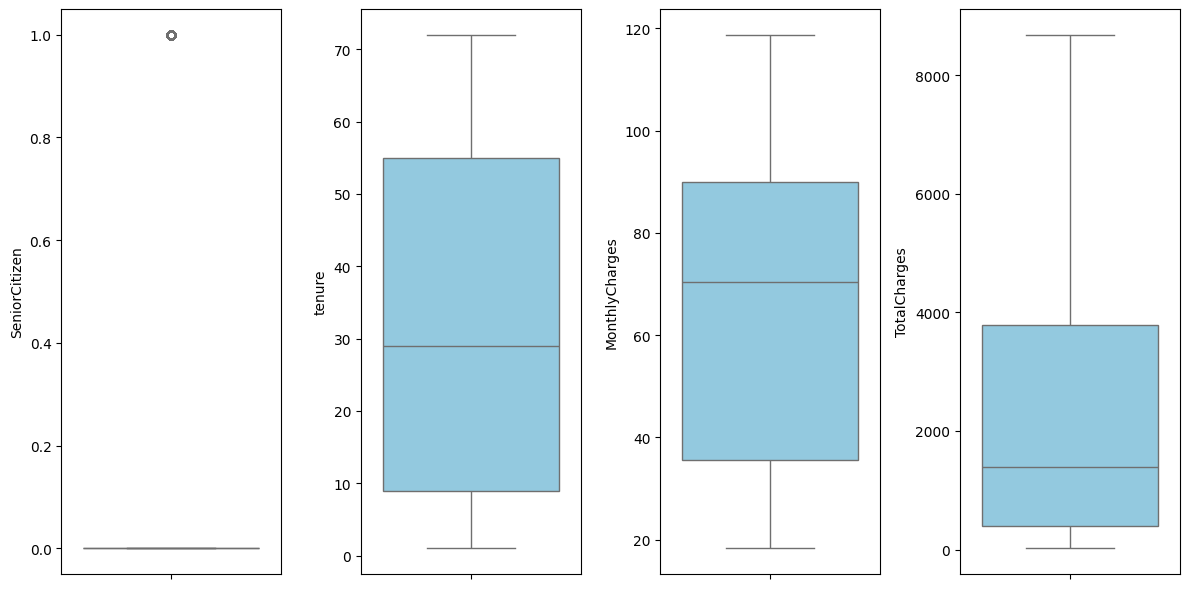

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical_columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

Observations:
* For `SeniorCitizen` outliers might not be as relevant since it's a binary variable.
* No outliers detected in `Tenure`, `MonthlyCharges`, and `TotalCharges`.
* `Tenure` shows a consistent distribution without extreme values, indicating similar customer tenures.
* `MonthlyCharges` lack outliers, suggesting uniformity in charges without significant deviations.
* `TotalCharges` exhibit no outliers, indicating a uniform distribution without exceptionally high or low charges.

### **KDE plot for knowing the distribution form**

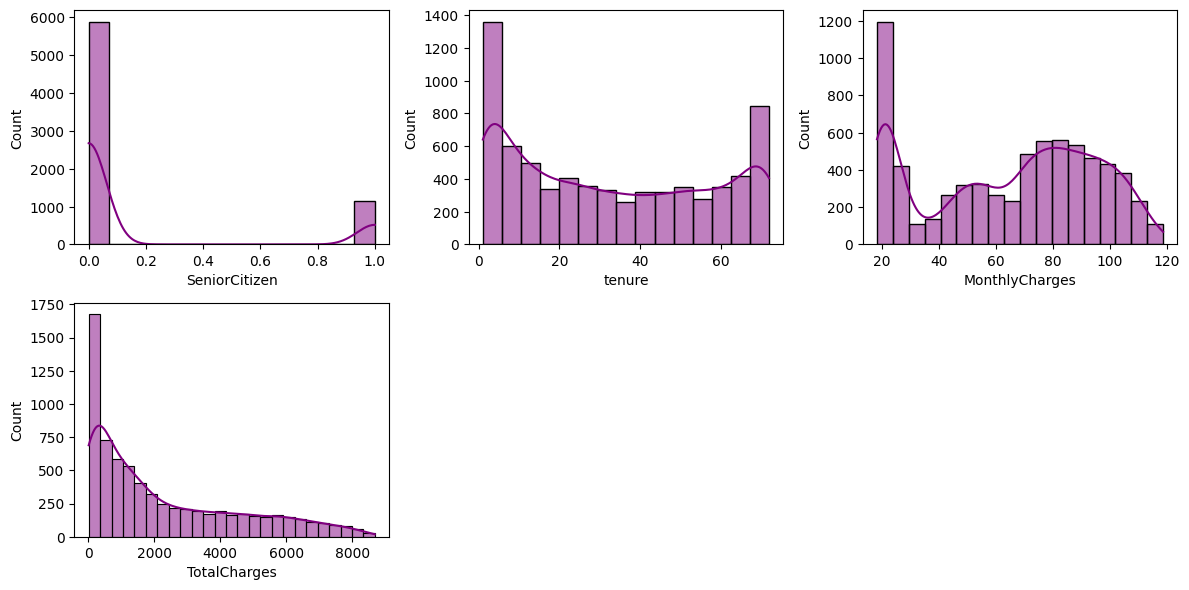

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

#plotting
features = numerical_columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='purple', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
* The majority of customers are non-SeniorCitizens. The maximum value of 1 for `SeniorCitizen` indicates the presence of SeniorCitizens in the dataset.
*   `Tenure` suggests that a considerable number of customers have shorter tenure durations, as indicated by the peak around the lower values. The distribution is right-skewed, with a tail extending towards higher tenure values.
* `MonthlyCharges` exhibit a peak around the mid-range values, as indicated by the histogram. The distribution is somewhat symmetric.
* The histogram for `TotalCharges` is positively skewed, with a concentration towards lower values. A significant number of customers appear to have lower total charges, as evidenced by the peak around the lower values.

Conclusion:
* A significant portion of customers has shorter durations. Monthly charges are distributed more evenly, while total charges show a skew towards lower values, implying that many customers have lower overall expenditures.

### **Countplot for Categorical Columns**

In [ ]:
def categorical_plots(df, category, type):

    num_cols = 3
    length = len(category)
    num_rows = length // 3 + 1 if length % 3 != 0 else length // 3

    size_x = num_cols * length if type == 'categorical' else num_cols * 7
    size_y = num_cols * num_rows if type == 'categorical' else num_cols * 2


    fig, axs = plt.subplots(num_rows, num_cols, figsize=(size_x,size_y))

    colors = ['#EC7063', '#A569BD','#EC407A', '#2196F3', '#00ACC1', '#FB8C00', '#51a027']

    for index, axes in enumerate(axs.flatten()[:len(category)]):
        df[category[index]].value_counts(normalize=True).plot(kind='bar',
                                                              ax = axes,
                                                              title = category[index].capitalize(),
                                                              color = colors[index]).set_xlabel("")
        axes.set_ylim(0,1)

        if type == 'categorical':
            axes.tick_params(axis='x', rotation=0)
        else:
            axes.tick_params(axis='x', rotation=45)

        position = df[category[index]].value_counts(normalize=True)
        get_position = position.tolist()
        data_point = position.apply(lambda x : x*100).astype('str').apply(lambda x : x[:5] +" %").tolist()

        for i in range(len(get_position)):
            axes.text(i, get_position[i], data_point[i],
                      ha='center', color = 'black', fontsize=10)

    plt.subplots_adjust(wspace=0.2,
                        hspace=0.3)

In [ ]:
category_1 = category_columns[:len(category_columns)//2]
category_2 = category_columns[6:]

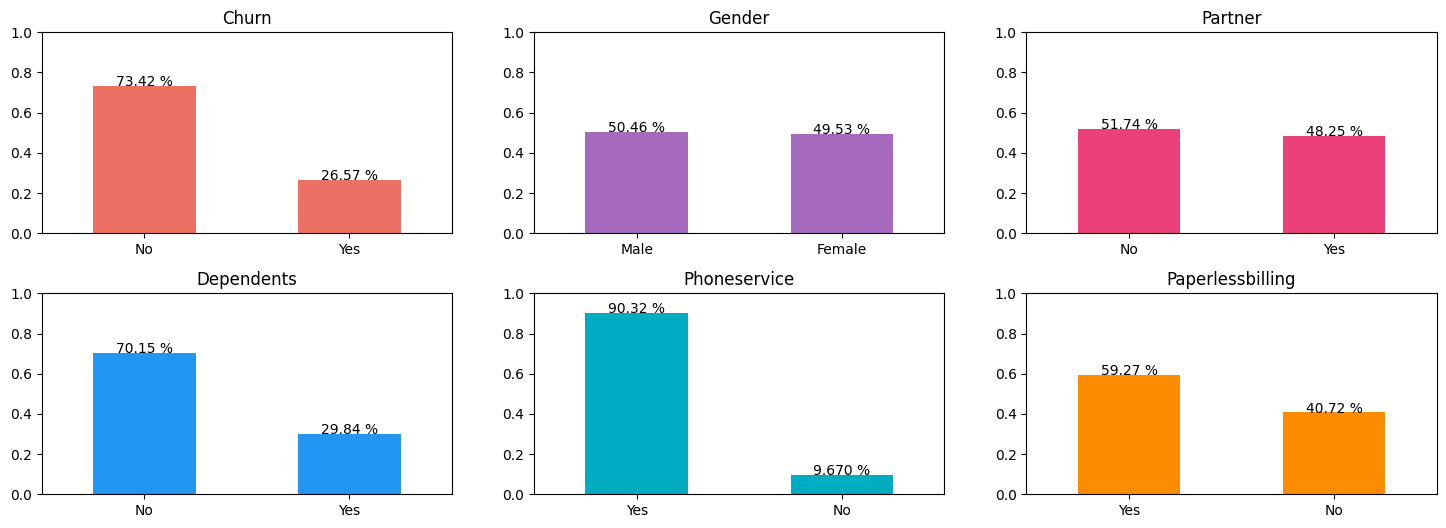

In [ ]:
categorical_plots(df, category_1, 'categorical')

Observations:
* The majority of customers, around 73.42%, remained subscribed, while approximately 26.57% of customers decided to stop subscribing, indicating churn.
* The distribution of users, both in terms of gender and partner statuses, is impressively balanced. We have an equitable representation of both male and female users, as well as individuals with and without partners.
* There's a clear difference between customers with and without dependents, where 29.84% have dependents. This raises a question about whether this demographic affects customers' decisions to stop using the service. Similar patterns are noticed in the use of telephone services.
* There's a somewhat similar percentage of customers choosing paperless billing and not, most customers show a strong preference for using paperless billing.

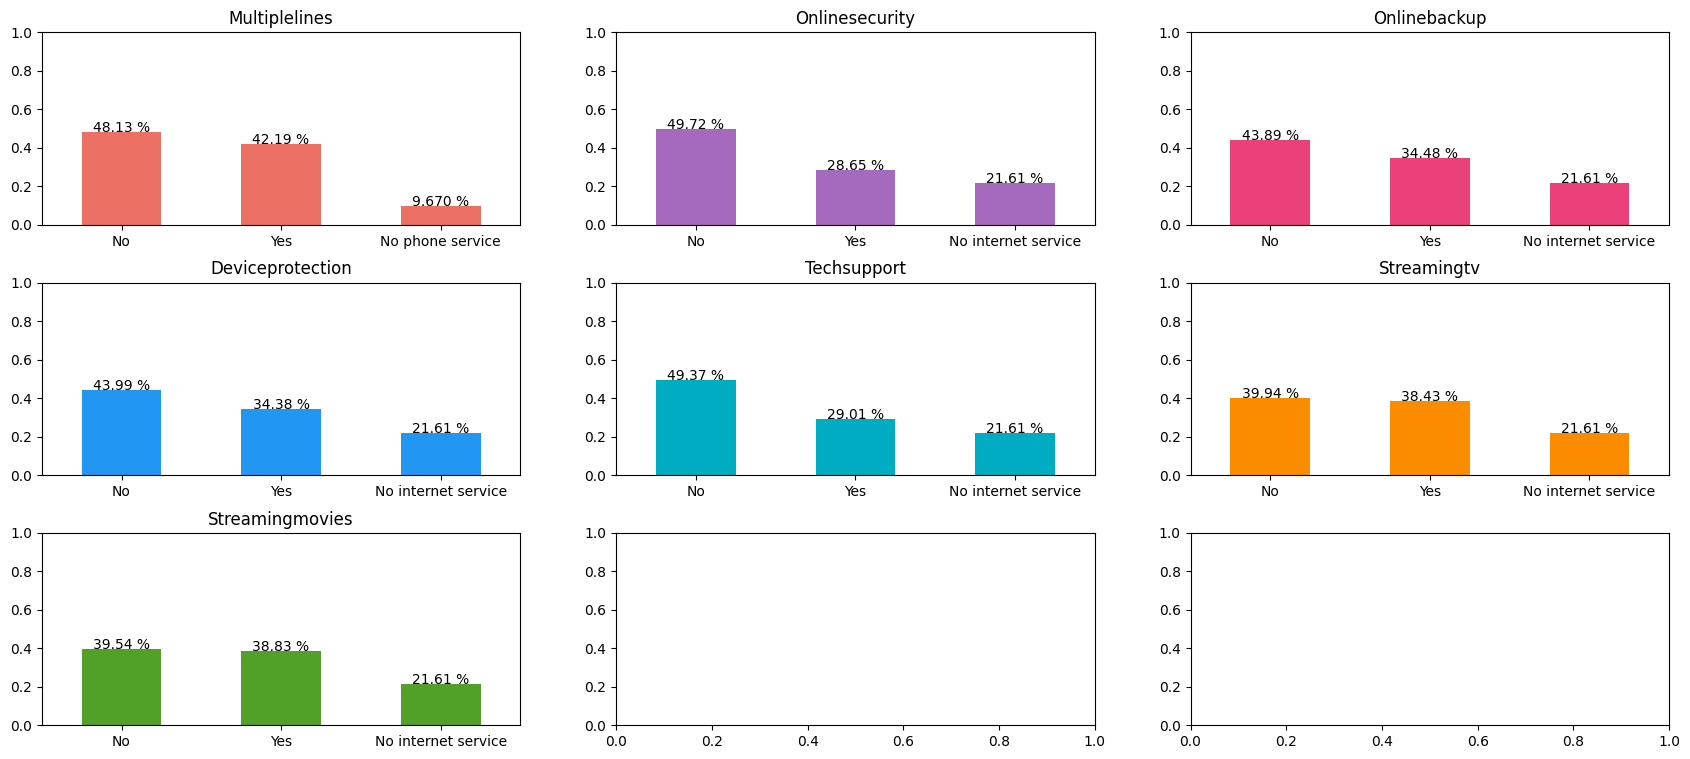

In [ ]:
categorical_plots(df, category_2, 'categorical')

Observations:
* Almost the same persentage of customers use or don't use features like `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`. But most folks is not use them.

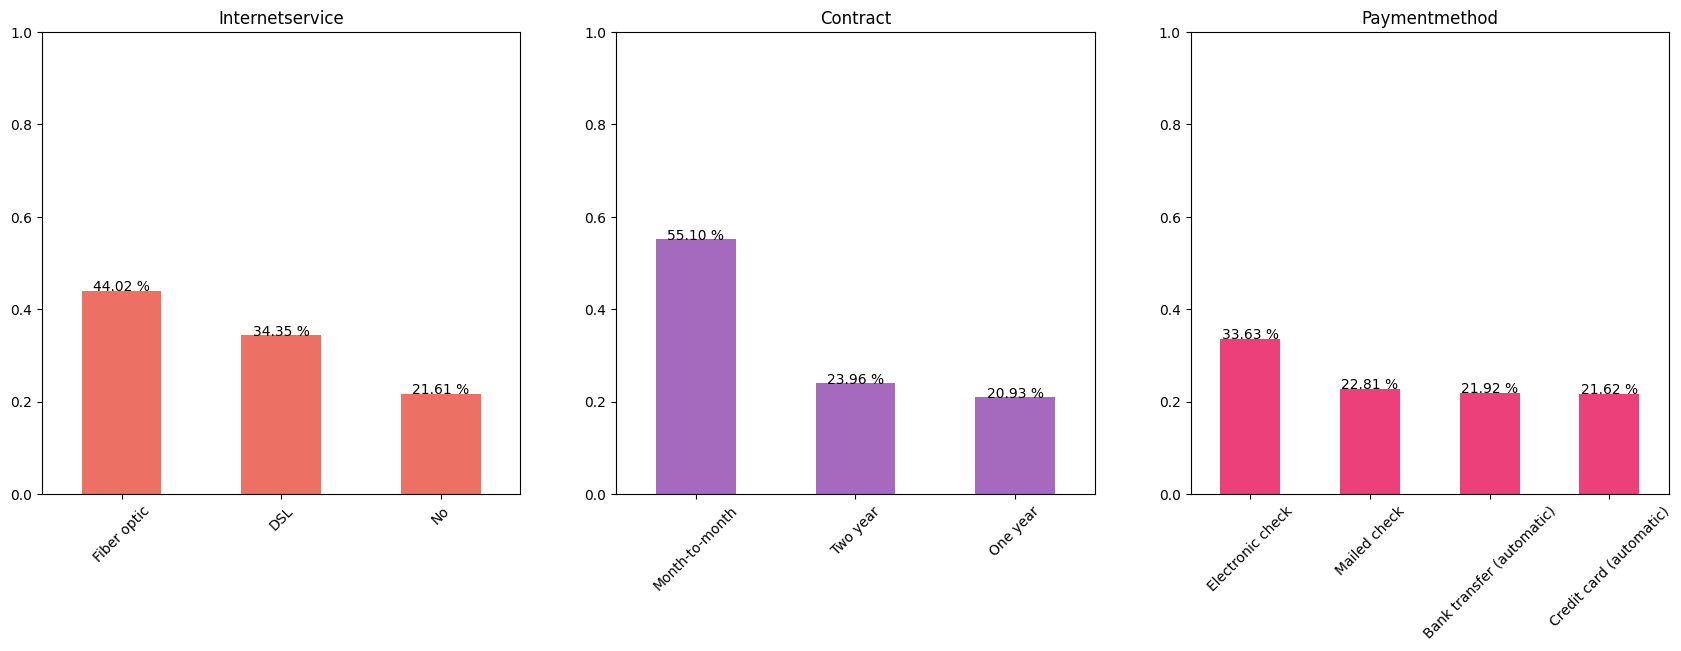

In [ ]:
categorical_plots(df, ordinal_columns, 'ordinal')

Observations:
* The majority of customers prefer fiber optic service over DSL and no internet service, according to the service usage graph. This raises the question of whether the type of service affect customer churn.
* A clear difference in the contract graph shows that more than 50% of customers prefer monthly payments instead of annual contracts.
* Electronic checks are the most popular payment method among customers, while other payment methods show relatively equal percentages.

Based on these observations, we can concentrate on the `Dependents`, `Internet Service`, and `Contract` variables to see if these factors influence customer churn.

## **Bivariate Analysis**

In [ ]:
# remember the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Does Contract affect Churn?**

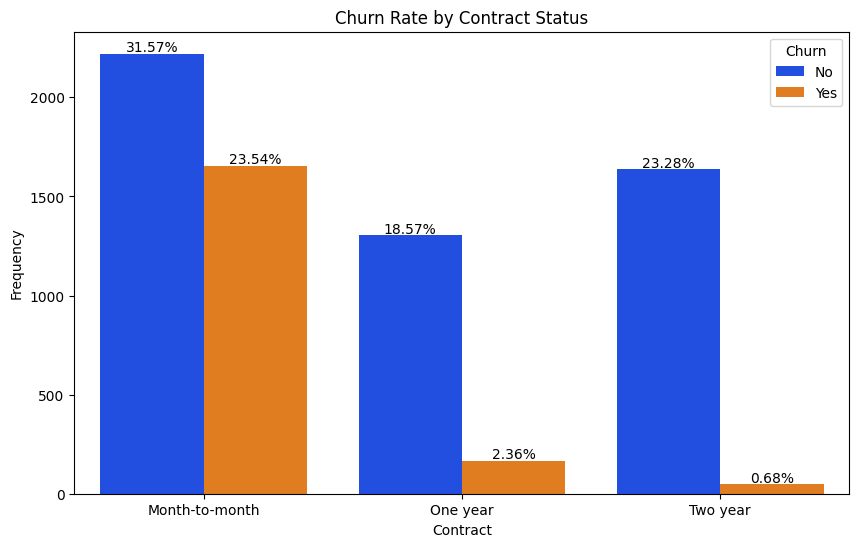

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette="bright")

# Add percentage labels on top of the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to check if the height is not zero
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{(height/total) * 100:.2f}%', ha="center")

# Set plot title and labels
plt.title("Churn Rate by Contract Status")
plt.xlabel("Contract")
plt.ylabel("Frequency")

# Show the plot
plt.show()

The churn rate among monthly contract (month to month) customers is significantly higher compared to customers with long-term (one year and two year) contracts. Customers with long-term (one year and two year) contracts exhibit a lower likelihood of discontinuing the service (churning)

**Does Internet Service affect Churn?**

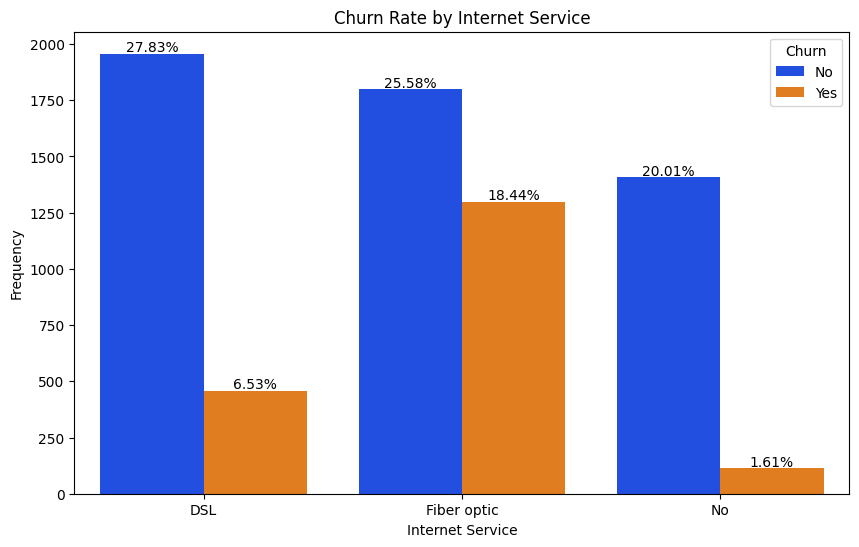

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='InternetService', hue='Churn', data=df, palette="bright")

# Add percentage labels on top of the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to check if the height is not zero
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{(height/total) * 100:.2f}%', ha="center")

# Set plot title and labels
plt.title("Churn Rate by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Frequency")

# Show the plot
plt.show()

The highest churn rate occurs among customers using fiber optic, followed by those using DSL (internet service that uses a phone line connection) service. This means that customers with internet service are more likely to churn compared to customers without internet service.

**Does Dependents affect Churn?**

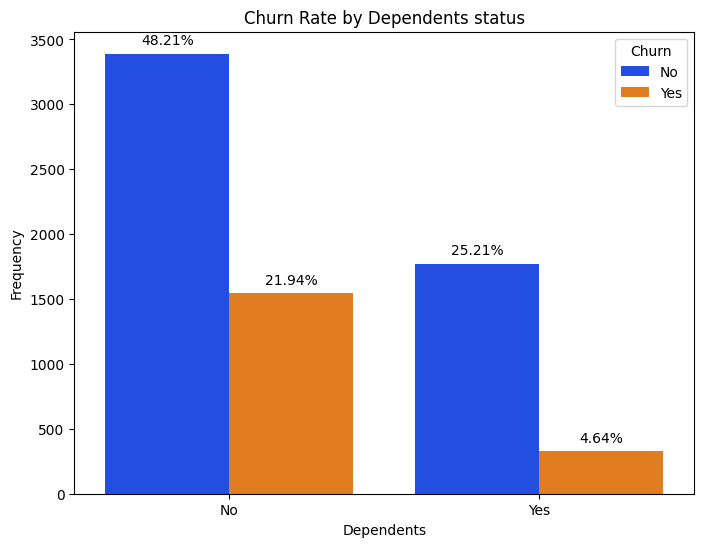

In [ ]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Dependents', hue='Churn', data=df, palette="bright")

# Add percentage labels on top of the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to check if the height is not zero
        ax.text(p.get_x() + p.get_width() / 2, height + total*0.01, f'{(height/total) * 100:.2f}%', ha="center")

# Set plot title and labels
plt.title("Churn Rate by Dependents status")
plt.xlabel("Dependents")
plt.ylabel("Frequency")

# Show the plot
plt.show()

From this graph, we observe that churn is more prevalent among customers without dependents compared to those with dependents. This suggests that customers with dependents are less inclined to churn compared to those without dependents.

<Axes: >

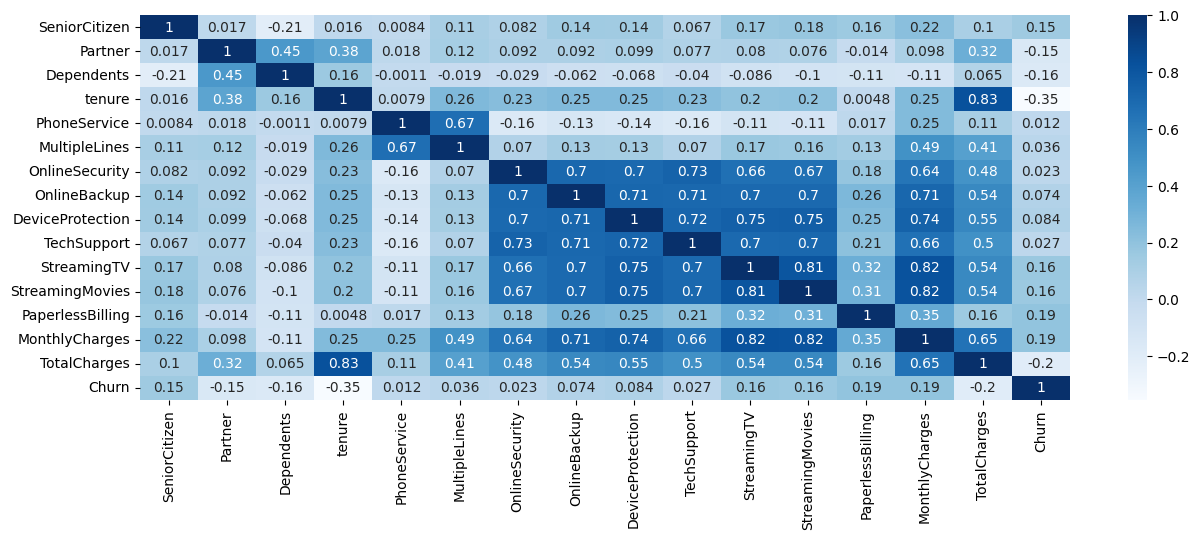

In [ ]:
# change the categorical value to numeric value
# No phone service / No internet service = 0, No = 1, Yes = 2

df_changes = df.copy()
for col in df_changes[categorical]:
    df_changes[col].replace({"No phone service" : 0}, inplace=True)
    df_changes[col].replace({"No internet service" : 0}, inplace=True)
    df_changes[col].replace({"No" :  1}, inplace=True)
    df_changes[col].replace({"Yes" : 2}, inplace=True)

plt.figure(figsize=(15,5))
sns.heatmap(df_changes.corr(numeric_only = True),cbar=True,annot=True,cmap='Blues')


* `Tenure` and `TotalCharges` show a strong positive correlation of 0.83, indicating a close relationship between the two variables. It's indicated that customers who maintain longer subscription periods tend to experience higher total charges. This means that if customers stay with the service for a long time, they'll end up paying more each month and gathering bigger total charges over time.
* `SteamingTV`, `StreamingMovie`, and `MonthlyCharger` are also strongly correlated. `StreamingTV` and `StreamingMovie` are closely related as both involve video content streaming. Users subscribing to `StreamingTV` services might also be interested in S`treamingMovie` services, and vice versa. Additionally,` MonthlyCharger` is strongly correlated with `StreamingTV`/`StreamingMovi`e, as these streaming services typically require a monthly subscription fee.
* Even though we found strong connections in other areas, it turns out that the chance of customers leaving (churn) doesn't seem closely tied to other things. This is evident from the low correlation values with other variables.

### **Conclusion**
1. The data does not contain major issues. There are only some NULL values and duplicated rows. We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. No outliers detected
4. The majority of customers, around 73.42%, remained subscribed, while approximately 26.57% of customers decided to stop subscribing, indicating churn.
5. From barcharts of `Churn` and `Contract` column,  We can say that, customers who choose a month-to-month contract are more likely to churn.
6. From barcharts of `Churn` and `InternetService` column,  We can say that, Customers with DSL internet and fiber optic service are more likely to churn using the service compared to those without internet.
7. From barcharts of `Churn` and `Dependent` column,  We can say that, customers with dependents are less likely to stop using the service.
8. From correlation heatmap: We can see that `tenure` has highly correlated with `MonthlyCharges`.

### **Deep Dive EDA**

**EDA Questions**
1. What types of internet services are most commonly used by customers?
2. Which contract types are predominantly chosen by customers?
3. How does customers churn relate to having dependents, types of internet service, and contract choices?
4. Does the length of time using Telkom's service affect the customer churn rate?


## **1. Types of internet services are most commonly used by customers**

In [ ]:
# Type of Internet Service wit the most commonly used by customers
top_internet_service = (df
            .groupby('InternetService')
            .agg(num_trx=('customerID','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            )
top_internet_service

,InternetService,num_trx
1,Fiber optic,3096
0,DSL,2416
2,No,1520


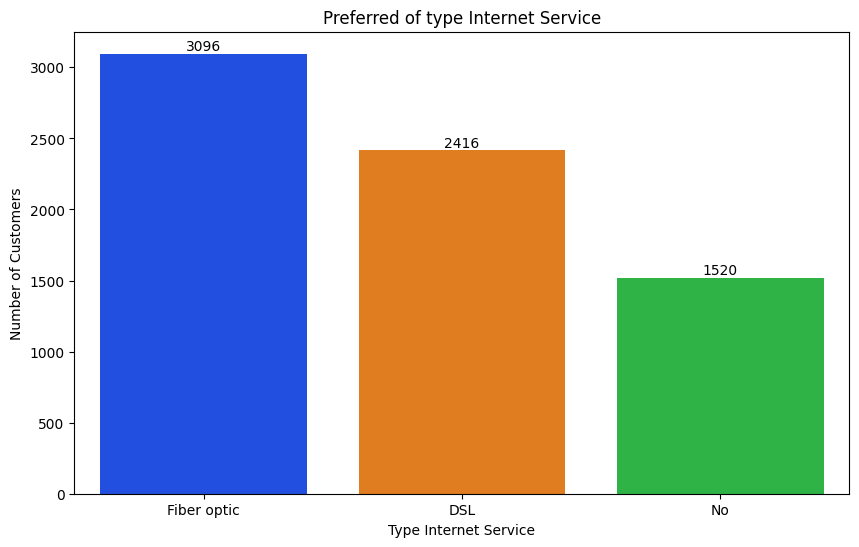

In [ ]:
# Plotting the bar chart with a reduced figure size
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=top_internet_service, x='InternetService', y='num_trx', hue='InternetService', palette='bright')

# Adding labels to each bar
for index, value in enumerate(top_internet_service['num_trx']):
    bar_plot.text(
        index,
        value + 0.1,  # Adjust this value for vertical positioning of the label
        str(value),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Preferred of type Internet Service')
plt.xlabel('Type Internet Service')
plt.ylabel('Number of Customers')
plt.show()

The most commonly used types of internet services by customers are Fiber Optic with total customers are 3096. This indicates that many customers prefer high-speed internet and are interested in advanced technology, emphasizing the importance of a stable and reliable connection in their choice of internet service.

## **Contract types are predominantly chosen by customers**

In [ ]:
#  the preferred payment methods among customers
top_contract = (df
            .groupby('Contract')
            .agg(num_trx=('customerID','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            )
top_contract

,Contract,num_trx
0,Month-to-month,3875
2,Two year,1685
1,One year,1472


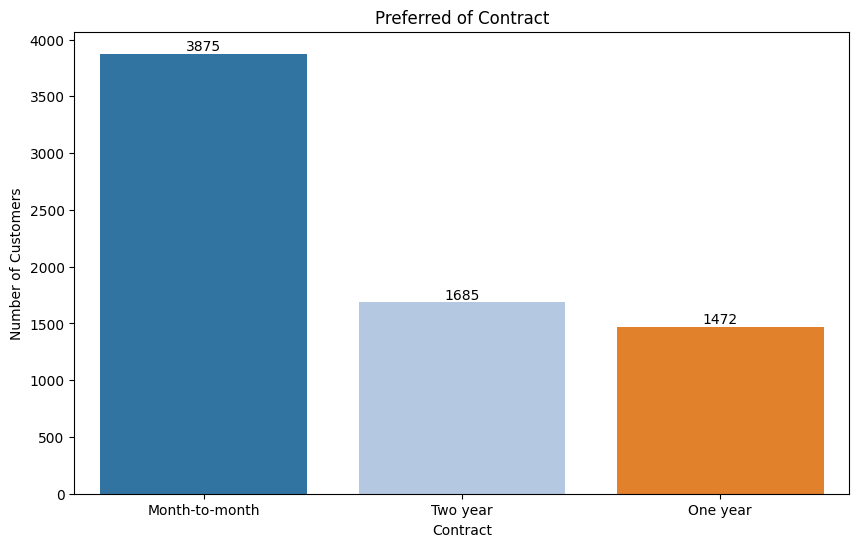

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=top_contract, x='Contract', y='num_trx', hue='Contract', palette='tab20')

# Adding labels to each bar
for index, value in enumerate(top_contract['num_trx']):
    bar_plot.text(
        index,
        value + 0.1,  # Adjust this value for vertical positioning of the label
        str(value),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Preferred of Contract')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.show()

Customers predominantly choose the "Month-to-month" contract type with total customers are 3875. This means that half of the customers prefer making month-to-month payments without a long-term commitment. This preference can be interpreted as an indication that customers value financial flexibility, the ability to adapt to changing needs, and the freedom to stop using the service without significant consequences.

## **3. How does customers churn relate to Dependents, Internet Service, and Contract**

In [ ]:
def bivariate_bar_plot(df, ordinal_columns, target_variabel, type):

    if type == 'bar':

        fig, axs = plt.subplots(1, 2, figsize=(12,5))

        colors = ["Set2", "flare"]

        for index, axes in enumerate(axs.flatten()):

            plot = sns.countplot(x = ordinal_columns[index], hue = target_variabel, data=df,
                                 ax = axes, palette = colors[index])

            plot.set(xlabel='', ylabel = 'Frequency', title=ordinal_columns[index])

            for index, p in enumerate(axes.patches):
                height = p.get_height()
                x = p.get_x() + (p.get_width()/2)
                if x != 0.0:
                    axes.text(x, y = height + 30, s = '{:.0f}'.format(height), ha = 'center')

    elif type == 'barstacked':

        fig, axs = plt.subplots(1,3, figsize = (18,5))

        colors = [['tomato','lightseagreen'], ['#A569BD','#00ACC1'], ['#00ACC1', '#FB8C00'] ]

        for index, axes in enumerate(axs.flatten()):
            df_stack = df.groupby([target_variabel, ordinal_columns[index]]).size().reset_index()
            df_stack = df_stack.pivot(columns= target_variabel, index= ordinal_columns[index], values=0)
            df_reverse = df_stack[df_stack.columns[::-1]]

            df_reverse.plot(kind='bar', stacked=True, ax = axes,
                            title = ordinal_columns[index], color = colors[index],
                            ylabel = 'Frequency').set_xlabel("")

            axes.tick_params(axis='x', rotation=0)

            for c in axes.containers:
                label = [int(l.get_height()) for l in c]
                axes.bar_label(c, labels = label, label_type = 'edge')

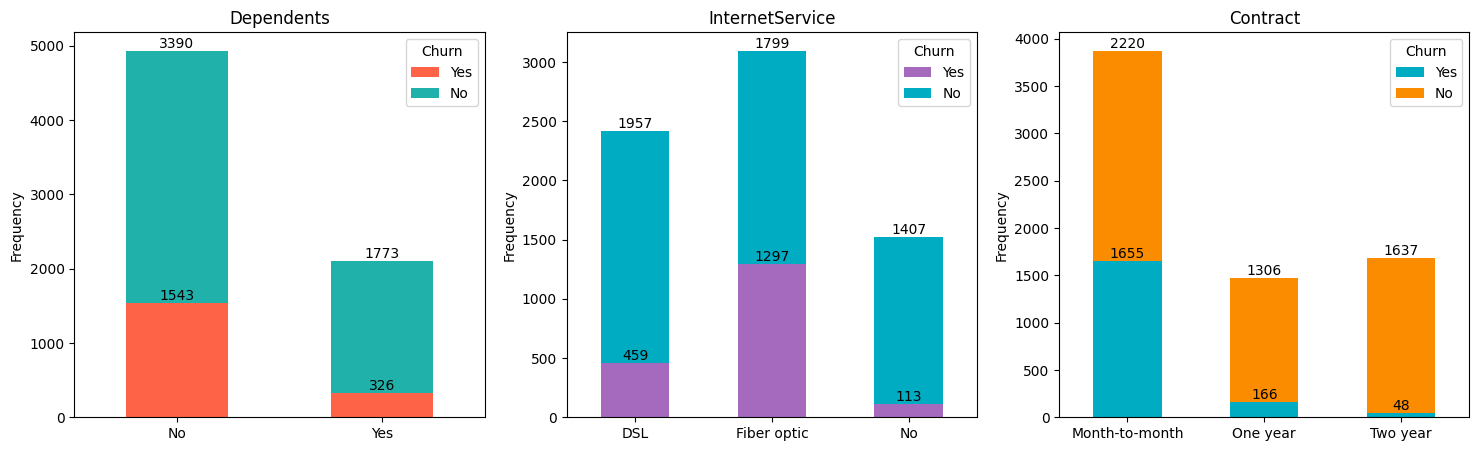

In [ ]:
columns = ['Dependents', 'InternetService', 'Contract']
bivariate_bar_plot(df, columns, 'Churn', 'barstacked')

Graph 1 - Dependants

* The relationship between customer churn and having dependents suggests that customers without dependents are more likely to churn compared to those with dependents. Customers without dependents are more likely to churn using the service. On the graph, the red color shows that 1543 customers without dependents stopped using the service, which is much more than those with dependents. This suggests that those without dependents are using the service for themselves. So, when they decide to churn, it's often influenced by personal factors like their own financial stability, personal changes, and flexibility in spending, without considering family needs.

Graph 2 - Internet Service

* More customers experience churn among those using fiber optic internet service compared to those using DSL. The purple-colored graph indicates the number of customers facing churn, where a total of 1297 fiber optic users are affected. This value is higher than both other user categories. Possible reasons could involve service quality issues, cost and package differences, and less satisfactory user experiences. However, looking back at the graph, the lowest churn occurs among customers without internet service, specifically only 113 individuals. This means that customers with internet service are more likely to churn compared to those without internet service. This could be due to financial constraints, leading them to choose essential services like telephone-only subscriptions.

Graph 3 - Contract

* Customers who churn are more prevalent among those who choose monthly contracts compared to annual contracts (one year and two years). The blue-colored graph illustrates customers churning based on different contract choices, indicating that a total of 1655 individuals churned in the monthly payment category. This highlights that monthly contracts provide flexibility for customers to unsubscribe each month without significant consequences. Uncertain financial considerations drive some customers to opt for this choice to adjust service costs to their monthly financial conditions.

## **Churn vs Tenure**

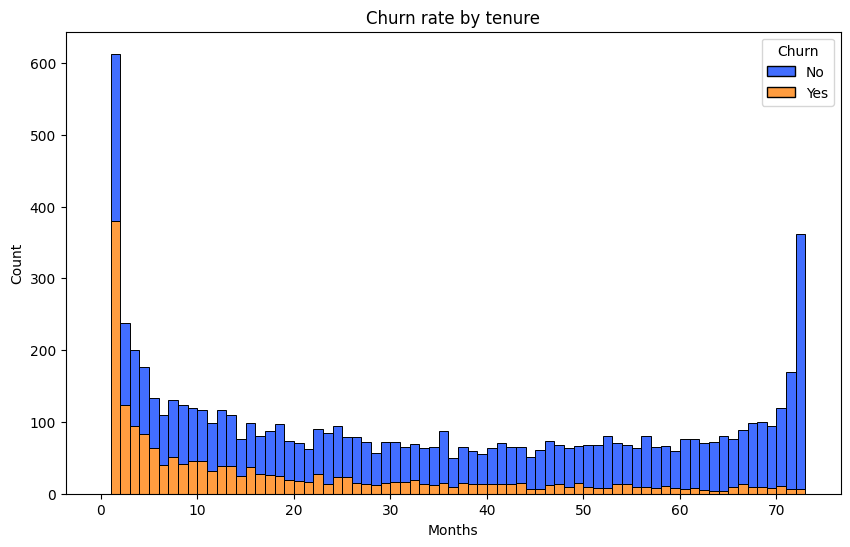

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='tenure', bins=range(0, max(df['tenure']) + 2, 1), hue='Churn', multiple="stack", palette="bright")

# Set plot title and labels
plt.title("Churn rate by tenure")
plt.xlabel("Months")
plt.ylabel("Count")

# Show the plot
plt.show()

The graph indicates that customers who churn are more likely to be those who have used the service for less than 5 months. The highest frequency of customer churn occurs in the first month of service usage. This suggests that many customers decide to stop using the service within the initial five months, with the majority discontinuing in the very first month. Possible reasons for this trend could include unsatisfactory initial experiences, quick assessments of the service, potential offers from competitors, or early customer dissatisfaction.